<a href="https://colab.research.google.com/github/santiagorestrepoo09/Recycle/blob/master/Proyectoreciclaje2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
  pip uninstall keras-preprocessing

Uninstalling Keras-Preprocessing-1.1.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras_Preprocessing-1.1.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/keras_preprocessing/*
Proceed (y/n)? y
  Successfully uninstalled Keras-Preprocessing-1.1.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import cv2
import os

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D
from keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random,os,glob

import matplotlib.pyplot as plt

In [10]:
data_path= '/content/drive/My Drive/Proyecto LEARNTORECYCLE/Proyecto Learn toRecycle/Dataset/Entrenamiento'
img_list = glob.glob(os.path.join(data_path, '*/*.jpg'))
len(img_list)

4501

In [11]:
train=ImageDataGenerator(horizontal_flip=True, 
                         vertical_flip=True, 
                         validation_split=0.1, 
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1/255,validation_split=0.1)

train_generator=train.flow_from_directory(data_path,
                                          target_size=(300,300),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

test_generator=test.flow_from_directory(data_path,
                                        target_size=(300,300),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')

labels = (train_generator.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 4053 images belonging to 6 classes.
Found 448 images belonging to 6 classes.
{'basura': 0, 'botellas': 1, 'carton': 2, 'metal': 3, 'papel': 4, 'vidrio': 5}
{0: 'basura', 1: 'botellas', 2: 'carton', 3: 'metal', 4: 'papel', 5: 'vidrio'}


In [12]:
#Escribir el archivo de etiquetas
print (train_generator.class_indices)

Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('/content/drive/My Drive/Proyecto LEARNTORECYCLE/Proyecto Learn toRecycle/modelo/labels.txt', 'w') as f:
  f.write(Labels)

{'basura': 0, 'botellas': 1, 'carton': 2, 'metal': 3, 'papel': 4, 'vidrio': 5}


In [13]:
#Construyendo CNN y guardando el modelo Keras

model=Sequential()
#Convolution blocks

model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5)) # No accuracy

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 
#model.add(SpatialDropout2D(0.5))

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
#model.add(SpatialDropout2D(0.5))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

filepath="/content/drive/My Drive/Proyecto LEARNTORECYCLE/Proyecto Learn toRecycle/modelo/model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

#Resumiendo nuestro modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 43808)            

In [0]:
#Compilación de modelos utilizando la función de pérdida de entropía cruzada categórica y Adam Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

# RMS PROP - No accuracy
#es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [15]:
#vamos a entrenar el modelo

history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=100,  ##Saltos por epochs
                              validation_data=test_generator,
                              validation_steps=251//32,
                              workers = 4,
                              callbacks=callbacks_list) 
#41 epoch - 75% 
#73 epoch- 76.9%
#78 epoch - 80%

Epoch 1/100
100/100 [==============================] - 565s 6s/step - loss: 1.5929 - acc: 0.3528 - val_loss: 1.5586 - val_acc: 0.3839

Epoch 00001: val_acc improved from -inf to 0.38393, saving model to /content/drive/My Drive/Proyecto LEARNTORECYCLE/Proyecto Learn toRecycle/modelo/model.h5
Epoch 2/100
100/100 [==============================] - 195s 2s/step - loss: 1.3455 - acc: 0.4701 - val_loss: 1.5296 - val_acc: 0.4420

Epoch 00002: val_acc improved from 0.38393 to 0.44196, saving model to /content/drive/My Drive/Proyecto LEARNTORECYCLE/Proyecto Learn toRecycle/modelo/model.h5
Epoch 3/100
100/100 [==============================] - 68s 685ms/step - loss: 1.1675 - acc: 0.5510 - val_loss: 1.2483 - val_acc: 0.5804

Epoch 00003: val_acc improved from 0.44196 to 0.58036, saving model to /content/drive/My Drive/Proyecto LEARNTORECYCLE/Proyecto Learn toRecycle/modelo/model.h5
Epoch 4/100
100/100 [==============================] - 66s 664ms/step - loss: 1.1189 - acc: 0.5691 - val_loss: 0.893

Maximum Probability:  0.75988334
Classified: vidrio


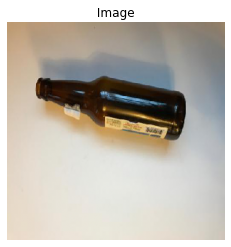

In [21]:
from keras.preprocessing import image
 # ----------------------------------------- prediccion --------------------------------------------------------

img_path = '/content/drive/My Drive/Proyecto LEARNTORECYCLE/Proyecto Learn toRecycle/test/vidrioprueba (4).jpg'
  
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title(" Image ")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)

print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

BASURA : 0.02 %
BOTELLAS : 0.02 %
CARTON : 18.24 %
METAL : 5.43 %
PAPEL : 0.3 %
VIDRIO : 75.99 %


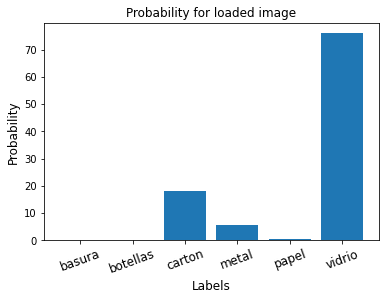

In [22]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()